# Reconstruting of the Figure $3$ in Bornside et al, $1991$

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
sns.set(style="darkgrid")

### Experimental data (approximate values from Figure 3 in the paper) and from Table $1$

In [9]:
#====Table data====
table_slopes = [-0.4989, -0.4850, -0.4873]
table_constants = [4.913, 5.316, 5.889]

#====Spin speed in rpm====
spin_speeds_exp = np.array([2000, 3000, 4000, 5000, 6000, 7000, 8000])
spin_speeds_theo = np.linspace(2000, 8000, 100)  

#====Experimental film thickness-calculated from table data====
dry_thickness_exp = []
for slope, constant in zip(table_slopes, table_constants):
    h_f_exp = 10**(slope * np.log10(spin_speeds_exp) + constant)
    dry_thickness_exp.append(h_f_exp)

### Fitting the data

In [10]:
#====Logarithmic transformation of experimental data for regression====
log_spin_speeds_exp = np.log10(spin_speeds_exp)
log_dry_thickness_exp = [np.log10(thickness) for thickness in dry_thickness_exp]

#====linear regression on experimental data====
regression_results = []
for log_dry_thickness in log_dry_thickness_exp:
    slope, intercept, r_value, p_value, std_err = linregress(log_spin_speeds_exp, log_dry_thickness)
    regression_results.append((slope, intercept, r_value, p_value, std_err))

### Theoretical data from Table $2$

In [11]:
rho = 1.11         # g/cm^3 (density of liquid, chlorobenzene)
c = 0.5474         # dimensionless constant
D_g = 0.074        # cm^2/s (binary diffusivity of solvent in air)
v_g = 0.1574       # cm^2/s (kinematic viscosity of air)
p_A_star = 0.0156  # atm (vapor pressure of pure solvent A)
M_A = 112.55       # g/mol (molecular weight of solvent A)
R = 82.06          # atm cm^3/(mol K) (universal gas constant)
T = 298            # K (temperature)
x_A_inf = 0        # Assumed no solvent concentration in bulk gas
x_A_0 = np.array([0.96, 0.92, 0.84])       # Concentration of solvent initially
eta_0 = np.array([0.0296, 0.0639, 0.298])  # Initial viscosity in Poise

### Equations $7$ and $8$ modeling

In [12]:
#====Equation 8====
k_tilde = c * D_g * v_g**(-0.5) * rho**(-1) * (p_A_star * M_A) / (R * T)

#====Equation 7====
dry_thickness_corrected = []
for i, x_0 in enumerate(x_A_0):
    h_f = (
        (1 - x_0)
        * ((3 * eta_0[i]) / (2 * rho)) ** (1 / 3)
        * k_tilde ** (1 / 3)
        * (x_0 - x_A_inf) ** (1 / 3)
        * spin_speeds_theo**(-0.5)
    )
    dry_thickness_corrected.append(h_f * 1e8)  # Convert to Angstroms (A^0)

### Plotting

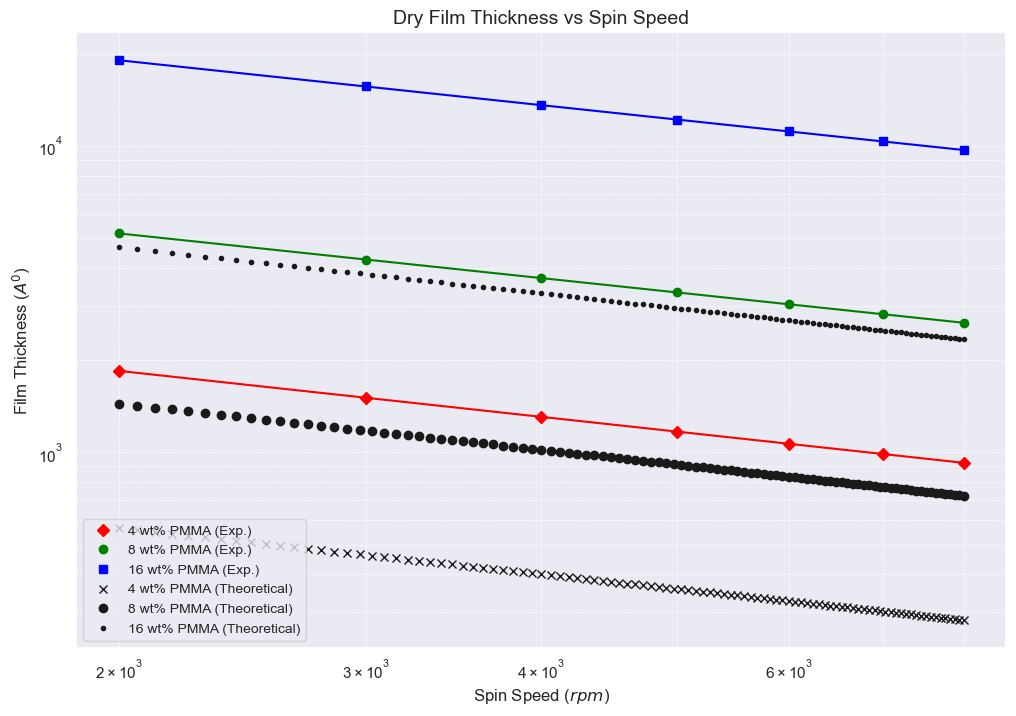

In [13]:
plt.figure(figsize=(12, 8))

#====Experimental data plots====
plt.plot(spin_speeds_exp, dry_thickness_exp[0], "D", color='red', label="4 wt% PMMA (Exp.)")
plt.plot(spin_speeds_exp, dry_thickness_exp[1], "o", color='green', label="8 wt% PMMA (Exp.)")
plt.plot(spin_speeds_exp, dry_thickness_exp[2], "s", color='blue', label="16 wt% PMMA (Exp.)")

#====Theoretical model lines====
plt.plot(spin_speeds_theo, dry_thickness_corrected[0], "kx", label="4 wt% PMMA (Theoretical)")
plt.plot(spin_speeds_theo, dry_thickness_corrected[1], "ko", label="8 wt% PMMA (Theoretical)")
plt.plot(spin_speeds_theo, dry_thickness_corrected[2], "k.", label="16 wt% PMMA (Theoretical)")

#====Regression lines for experimental data====
colors = ['red', 'green', 'blue']
labels = ["4 wt%", "8 wt%", "16 wt%"]
for i, result in enumerate(regression_results):
    slope, intercept = result[:2] 
    reg_line = 10**(slope * log_spin_speeds_exp + intercept)
    plt.plot(spin_speeds_exp, reg_line, color=colors[i], linestyle='-')

#====Log-log scaling====
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Spin Speed ($rpm$)", fontsize=12)
plt.ylabel("Film Thickness ($A^0$)", fontsize=12)
plt.title("Dry Film Thickness vs Spin Speed", fontsize=14)
plt.legend(loc="lower left", fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [14]:
#====Regression results====
print("=====Regression Results (Experimental Data)=====")
for i, (slope, intercept, r_value, _, std_err) in enumerate(regression_results):
    print(f"{labels[i]} PMMA:")
    print(f"  Slope: {slope:.4f}, Intercept: {intercept:.4f}")

=====Regression Results (Experimental Data)=====
4 wt% PMMA:
  Slope: -0.4989, Intercept: 4.9130
8 wt% PMMA:
  Slope: -0.4850, Intercept: 5.3160
16 wt% PMMA:
  Slope: -0.4873, Intercept: 5.8890
